# **Aprendizaje no supervisado**
# UL11. Reforzamiento 1

## <font color='blue'>**Proyecto**</font>


El presente proyecto consiste en 3 partes. La primera parte consiste en generar mediante técnicas de clustering, los grupos que mejor representen el problema en cuestión.
Luego debera aplicar distintas técnicas de selección de características y de reducción de dimensionalidad para obtener el mejor resultado posible en el problema de clasificación binaria.
El conjunto de datos se encuentra en https://archive.ics.uci.edu/ml/datasets/HTRU2

Ingrese al link si quiere saber más sobre el conjunto de datos.

## 1. Clustering

Las primeras 8 columnas son las características del dataset y la última es la clase. Realice primero el proceso de clustering con las características de los datos, ocupando al menos 2 técnicas distintas de clustering.

Reporte las medidas de desempeño Silhouette, Homogeneity y Completeness.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving HTRU_2.csv to HTRU_2.csv


In [ ]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score

from IPython.display import display
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.preprocessing import scale

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
data= pd.read_csv("HTRU_2.csv", names=['Mean of the integrated profile' , 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile',
                                   'Skewness of the integrated profile','Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve',
                                   'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve','Class'])

y_data = data["Class"]
X_data = data.drop("Class", axis=1)

In [ ]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   Class                                         17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=4)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_data.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_data.columns)

In [ ]:
#Aplicamos PCA en los datasets
#X_for_pca = X_train.append(X_test, ignore_index=True)
X_for_pca = scaler.fit_transform(X_data)
# 8 dimensiones
pca = PCA(n_components=8)
pca.fit_transform(X_for_pca)

print(pca.explained_variance_ratio_)

[0.51675584 0.26807564 0.10116862 0.0571781  0.03227836 0.01998491
 0.00255524 0.00200328]


Text(0.5, 1.0, 'Pulsars Dataset - Explained Variance')

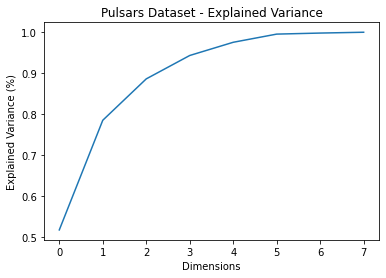

In [ ]:
plt.figure()
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance (%)")
plt.title("Pulsars Dataset - Explained Variance")

In [ ]:
# Reducción de 2 dimensiones
pca = PCA(n_components=2)
X_reduced = pd.DataFrame(
    pca.fit_transform(X_for_pca),
    columns=["Componente Principal 1", "Componente Principal 2"],
)

In [ ]:
X_reduced.head()

,Componente Principal 1,Componente Principal 2
0,-1.278849,-1.273133
1,-1.020553,-0.201162
2,0.188289,0.432114
3,-1.015466,-1.469881
4,-0.822626,2.123651


In [ ]:
# Kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_reduced)
clusters = kmeans.predict(X_reduced)

centers_pulsars = kmeans.cluster_centers_

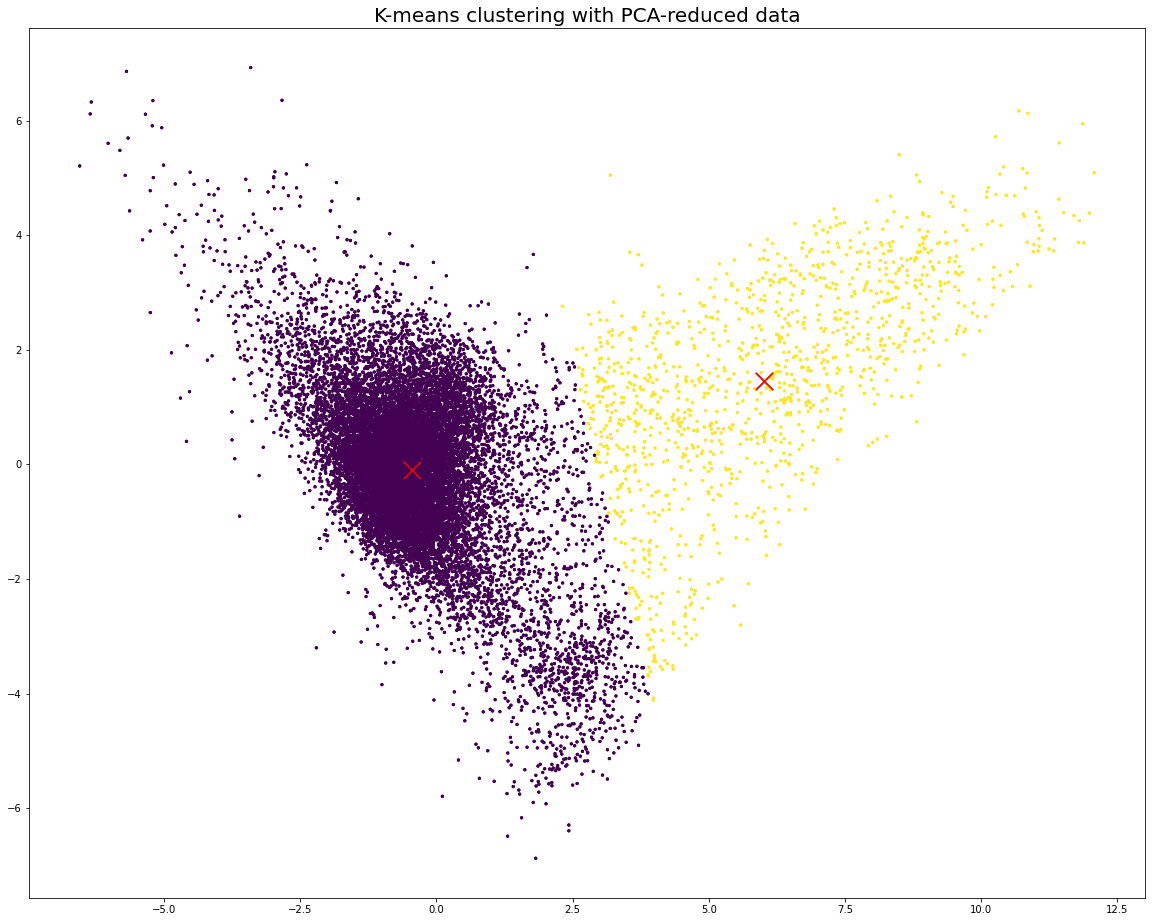

In [ ]:
def plot_clusters(X, clusters=None, centers=None):
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=5, cmap="viridis")

    if np.any(centers):
        plt.scatter(
            centers[:, 0], centers[:, 1], marker="x", s=300, linewidths=10, color="r"
        )


X_plot = np.array(X_reduced)

plt.figure(figsize=[20, 16])
plot_clusters(X_plot, clusters=clusters, centers=centers_pulsars)
plt.title("K-means clustering with PCA-reduced data", fontsize=20)

plot_clusters(X_plot, clusters=clusters, centers=centers_pulsars)

Número de clusters: 9
Mean Silhouette score: 0.3972038894731377


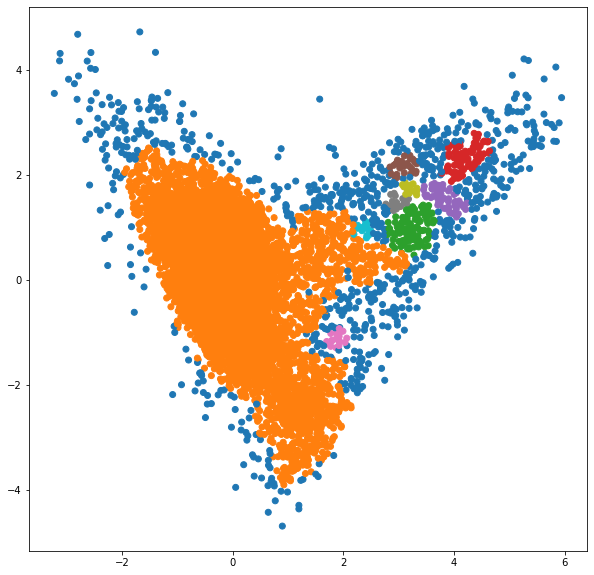

In [ ]:
# DBSCAN
# Normalización de las variables

X = StandardScaler().fit_transform(X_reduced)

# Entrenar DBSCAN
y_pred = DBSCAN(eps=0.2, min_samples=20).fit_predict(X)

# Graficar las predicciones
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='tab10')

# Imprimir los resultados
print('Número de clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
#print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
#print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

In [ ]:
kmeans = KMeans(n_clusters=2)

#KMEANS SIN PCA
kmeans.fit(X_data)
clusters_sin_pca=pd.DataFrame(kmeans.predict(X_data), columns=['Class_kmeans_sin_pca'])

#KMEANS SIN PCA y SOLO DOS VARIABLES
kmeans.fit(X_data[['Excess kurtosis of the integrated profile','Standard deviation of the DM-SNR curve']])
clusters_sin_pca_2_var=pd.DataFrame(kmeans.labels_, columns=['Class_kmeans_sin_pca_2_var'])

#KMEANS CON PCA y TODAS LAS VARIABLES
kmeans.fit(X_reduced)
clusters_con_pca=pd.DataFrame(kmeans.labels_, columns=['Class_kmeans_con_pca'])

finalDf = pd.concat([X_reduced, y_data], axis = 1)
finalDf = pd.concat([finalDf,clusters_con_pca], axis = 1)
finalDf = pd.concat([finalDf,clusters_sin_pca], axis = 1)
finalDf = pd.concat([finalDf,clusters_sin_pca_2_var], axis = 1)

In [ ]:
from sklearn.metrics import v_measure_score

print('Metricas Kmeans con PCA y todas las caracteristicas')
# Calcular la homogeneity y el completeness.
homogeneity = metrics.homogeneity_score(finalDf['Class'], finalDf['Class_kmeans_con_pca'])
completeness = metrics.completeness_score(finalDf['Class'], finalDf['Class_kmeans_con_pca'])
v_measure=v_measure_score(finalDf['Class'], finalDf['Class_kmeans_con_pca'])
print('homogeneity',float(homogeneity))
print('completeness',float(completeness))
print('v_measure',float(v_measure))

print('-------------------------------------------')
print('Metricas Kmeans sin PCA y todas las caracteristicas')
homogeneity = metrics.homogeneity_score(finalDf['Class'], finalDf['Class_kmeans_sin_pca'])
completeness = metrics.completeness_score(finalDf['Class'], finalDf['Class_kmeans_sin_pca'])
v_measure=v_measure_score(finalDf['Class'], finalDf['Class_kmeans_sin_pca'])
print('homogeneity',homogeneity)
print('completeness',completeness)
print('v_measure',float(v_measure))

print('-------------------------------------------')
print('Metricas Kmeans sin PCA y 2 caracteristicas')
homogeneity = metrics.homogeneity_score(finalDf['Class'], finalDf['Class_kmeans_sin_pca_2_var'])
completeness = metrics.completeness_score(finalDf['Class'], finalDf['Class_kmeans_sin_pca_2_var'])
v_measure=v_measure_score(finalDf['Class'], finalDf['Class_kmeans_sin_pca_2_var'])
print('homogeneity',homogeneity)
print('completeness',completeness)
print('v_measure',float(v_measure))

Metricas Kmeans con PCA y todas las caracteristicas
homogeneity 0.5406108301260637
completeness 0.6662625062474953
v_measure 0.5968956571144964
-------------------------------------------
Metricas Kmeans sin PCA y todas las caracteristicas
homogeneity 0.031072864356531088
completeness 0.02300602331222301
v_measure 0.02643778644792407
-------------------------------------------
Metricas Kmeans sin PCA y 2 caracteristicas
homogeneity 0.3189962490382731
completeness 0.2290969600683835
v_measure 0.2666738785069096


0.5406108301260637
0.6662625062474953


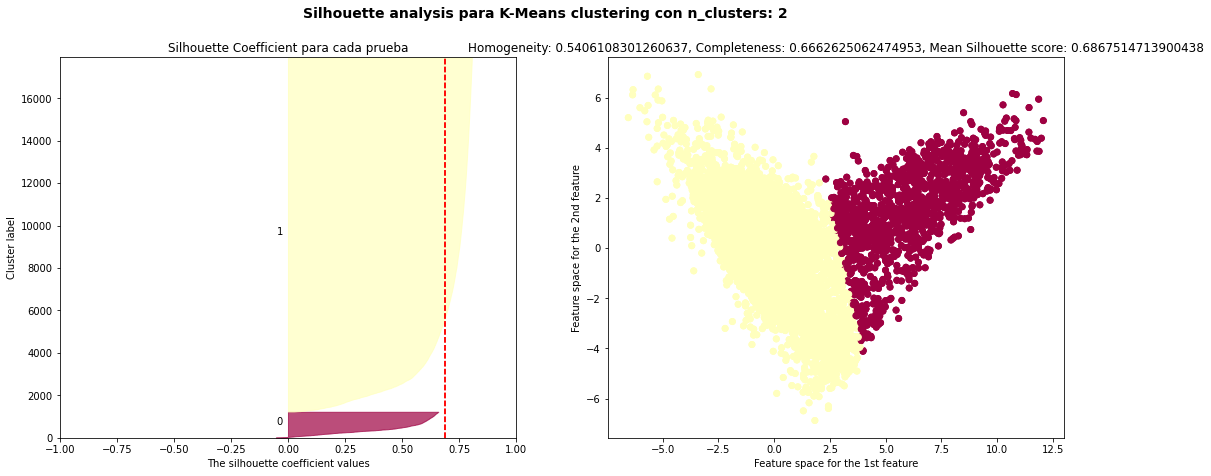

In [ ]:
#Graficamos el coeficiente de Silhouette para el caso de Kmeans con PCA y todas las caracteristicas

homogeneity = metrics.homogeneity_score(finalDf['Class'], finalDf['Class_kmeans_con_pca'])
completeness = metrics.completeness_score(finalDf['Class'], finalDf['Class_kmeans_con_pca'])
print(homogeneity)
print(completeness)
# Calcular el Silhouette Coefficient para cada ejemplo.
s = metrics.silhouette_samples(X_reduced, finalDf['Class_kmeans_con_pca'])

# Calcular el Silhouette Coefficient promedio para todos los puntos.
s_mean = metrics.silhouette_score(X_reduced, finalDf['Class_kmeans_con_pca'])

# Gráficos -----------------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Configure plot.
plt.suptitle('Silhouette analysis para K-Means clustering con n_clusters: {}'.format(2),
              fontsize=14, fontweight='bold')

# Configure 1st subplot.
ax1.set_title('Silhouette Coefficient para cada prueba')
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.set_xlim([-1, 1])
ax1.set_ylim([0, len(X_reduced) + (3) * 10])

# Configure 2st subplot.
ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity,
                                                                                        completeness,
                                                                                        s_mean))
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

# For 1st subplot ------------------------------------------------------------------------------------------
import matplotlib.cm as cm
    # Plot Silhouette Coefficient for each sample
y_lower = 10
for i in range(2):
  ith_s = s[finalDf['Class_kmeans_con_pca'] == i]
  ith_s.sort()
  size_cluster_i = ith_s.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.Spectral(float(i) / 2)
  ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                     facecolor=color, edgecolor=color, alpha=0.7)
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

  # Plot the mean Silhouette Coefficient using red vertical dash line.
  ax1.axvline(x=s_mean, color="red", linestyle="--")

  # For 2st subplot -------------------------------------------------------------------------------------------

  # Plot the predictions
  colors = cm.Spectral(finalDf['Class_kmeans_con_pca'].astype(float) / 2)
  ax2.scatter(X_reduced['Componente Principal 1'], X_reduced['Componente Principal 2'], c=colors)


### 2. Selección de Caracteristicas

Ocupe al menos 3 técnicas de selección de características (1 de cada familia de técnicas) para quedarse con el subconjunto que maximice el indice de desempeño F1. Tambien genere un reporte de clasificación. Elija 1 algoritmo de clasificación para realizarlo.



#### 2.1. ANOVA F-value

In [ ]:
df_names = data[['Mean of the integrated profile','Standard deviation of the integrated profile',
'Excess kurtosis of the integrated profile','Skewness of the integrated profile','Mean of the DM-SNR curve',
'Standard deviation of the DM-SNR curve','Excess kurtosis of the DM-SNR curve','Skewness of the DM-SNR curve']]

In [ ]:
# Create f_classif object to calculate F-value
f_value = f_classif(X_data, y_data)

# Print the name and F-value of each feature
for feature in zip(df_names.columns, f_value[0]):
    print(feature)

('Mean of the integrated profile', 14830.932625341937)
('Standard deviation of the integrated profile', 2728.2514947351387)
('Excess kurtosis of the integrated profile', 30033.327223542175)
('Skewness of the integrated profile', 18143.2302502337)
('Mean of the DM-SNR curve', 3426.572385783467)
('Standard deviation of the DM-SNR curve', 5701.2553534048275)
('Excess kurtosis of the DM-SNR curve', 3226.140850282631)
('Skewness of the DM-SNR curve', 1288.0448170654058)


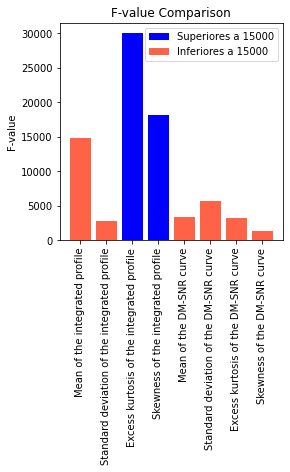

In [ ]:
# Create a bar chart for visualizing the F-values
plt.figure(figsize=(4,4))
plt.bar(x=df_names.columns, height=np.where(f_value[0] > 15000, f_value[0], 0), color='Blue', label='Superiores a 15000')
plt.bar(x=df_names.columns, height=np.where(f_value[0] < 15000, f_value[0], 0), color='Tomato', label='Inferiores a 15000')
#plt.bar(x=df_names.columns, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.legend()
plt.show()

#### 2.2. Variance Threshold

In [ ]:
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold()

# Perform variance thresholding
selector.fit_transform(X_data)

# Print the name and variance of each feature
for feature in zip(df_names.columns, selector.variances_):
    print(feature)

('Mean of the integrated profile', 186.8046875)
('Standard deviation of the integrated profile', 46.82662485126455)
('Excess kurtosis of the integrated profile', 1.132117260643333)
('Skewness of the integrated profile', 38.04102827819614)
('Mean of the DM-SNR curve', 223.17892979799998)
('Standard deviation of the DM-SNR curve', 103.27177843499999)
('Excess kurtosis of the DM-SNR curve', 20.303729364988463)
('Skewness of the DM-SNR curve', 1192.9778126029998)


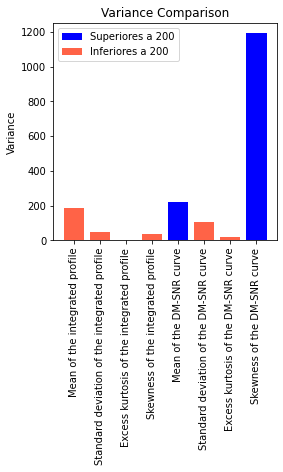

In [ ]:
# Create a bar chart for visualizing the variances
plt.figure(figsize=(4,4))
plt.bar(x=df_names.columns, height=np.where(selector.variances_ > 200, selector.variances_, 0), color='Blue', label='Superiores a 200')
plt.bar(x=df_names.columns, height=np.where(selector.variances_ < 200, selector.variances_, 0), color='tomato', label='Inferiores a 200')
#plt.bar(x=df_names.columns, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')
plt.legend()
plt.show()

#### 2.3. Mutual Information

In [ ]:
# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(df_names.columns, MI_score):
    print(feature)

('Mean of the integrated profile', 0.1919792758475265)
('Standard deviation of the integrated profile', 0.08823451838523888)
('Excess kurtosis of the integrated profile', 0.2264379704010573)
('Skewness of the integrated profile', 0.19451222834838888)
('Mean of the DM-SNR curve', 0.11469002391244398)
('Standard deviation of the DM-SNR curve', 0.11924799424186516)
('Excess kurtosis of the DM-SNR curve', 0.11339290952774439)
('Skewness of the DM-SNR curve', 0.11506426966847827)


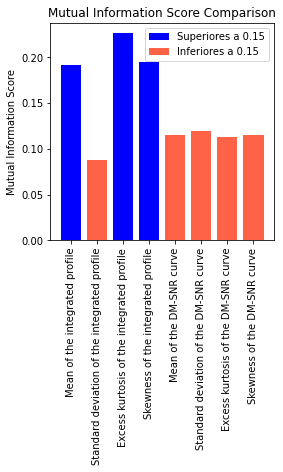

In [ ]:
# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(4,4))
plt.bar(x=df_names.columns, height=np.where(MI_score > 0.15, MI_score, 0), color='blue', label='Superiores a 0.15')
plt.bar(x=df_names.columns, height=np.where(MI_score < 0.15, MI_score, 0), color='tomato', label='Inferiores a 0.15')
plt.legend()
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

#### 2.4. SelectKBest

In [ ]:
# Create a SelectKBest object
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=2)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_data_new = skb.fit_transform(X_data, y_data)

# Print the results
print('Number of features before feature selection: {}'.format(X_data.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

Number of features before feature selection: 8
Number of features after feature selection: 2


In [ ]:
# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + df_names.columns[feature_list_index])

- Excess kurtosis of the integrated profile
- Skewness of the integrated profile


#### 2.5 Analisis de valores F1 utilizando Regresión Logistica

In [ ]:
# 1 y 4.-) ANOVA y SelectKBest (Utilizan las mismas variables)

# Separación de data set en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(X_data[['Excess kurtosis of the integrated profile','Skewness of the integrated profile']],
                                                    y_data, test_size = 0.2, random_state = 0)
# Partimos por estandarizar las variables
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

y_pred = fit1.predict(X_test_sc)

matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

0.0426030158996582
[[3290   16]
 [  57  217]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3306
           1       0.93      0.79      0.86       274

    accuracy                           0.98      3580
   macro avg       0.96      0.89      0.92      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
# 2.-) Variance Threshold

# Separación de data set en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(X_data[['Mean of the DM-SNR curve', 'Skewness of the DM-SNR curve']],
                                                    y_data, test_size = 0.2, random_state = 0)
# Partimos por estandarizar las variables
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

y_pred = fit1.predict(X_test_sc)

matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

0.025322675704956055
[[3272   34]
 [ 255   19]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3306
           1       0.36      0.07      0.12       274

    accuracy                           0.92      3580
   macro avg       0.64      0.53      0.54      3580
weighted avg       0.88      0.92      0.89      3580



In [ ]:
# 3.-) Mutual Information

# Separación de data set en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(X_data[['Mean of the integrated profile', 'Excess kurtosis of the integrated profile','Skewness of the integrated profile']],
                                                    y_data, test_size = 0.2, random_state = 0)
# Partimos por estandarizar las variables
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

y_pred = fit1.predict(X_test_sc)

matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

0.06203961372375488
[[3289   17]
 [  57  217]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3306
           1       0.93      0.79      0.85       274

    accuracy                           0.98      3580
   macro avg       0.96      0.89      0.92      3580
weighted avg       0.98      0.98      0.98      3580



### 2.6. Exhaustive Feature Selection (EFS)

In [ ]:
# Import ExhaustiveFeatureSelector from Mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Para nuestro ejercicio el clasificador/estimador será la regresión logística
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creamos la regresión logística como clasificador
lr = LogisticRegression()

# creamos un objeto EFS
efs = EFS(estimator=lr,        # clasificador/estimador
          min_features=1,      # El mínimo de caracteristicas será  1
          max_features=3,      # El máximo de caracteristicas será  1
          scoring='accuracy',  # la metrica escogida sera el accuracy
          cv=5)                # el numero de cross-validations en este caso será 5

# entrenamos nuestro dataset
efs = efs.fit(X_data, y_data)

#veamos los resultados
print('Mayor accuracy score: %.2f' % efs.best_score_)
print('Mejor subset (indices):', efs.best_idx_)
print('Mejor subset (nombres):', efs.best_feature_names_)

Features: 92/92

Mayor accuracy score: 0.98
Mejor subset (indices): (2, 4, 5)
Mejor subset (nombres): ('Excess kurtosis of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve')


In [ ]:
# ahora buscamos los score completos del subset entregado
# Separación de data set en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(X_data[['Excess kurtosis of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve']],
                                                    y_data, test_size = 0.2, random_state = 0)
# Partimos por estandarizar las variables
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

y_pred = fit1.predict(X_test_sc)

matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

0.02878117561340332
[[3289   17]
 [  45  229]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### 2.7. Sequential Forward Selection (SFS)

In [ ]:
# Import SequentialFeatureSelector from Mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# Creamos la regresión logística como clasificador
lr = LogisticRegression()

# Creamos un objeto SFS
sfs = SFS(estimator=lr,       # clasificador/estimador
          k_features=(1, 3),  # considera la combinacion entre 1 y 4 para los atributos
          forward=True,       # este parametro es true para SFS
          scoring='accuracy', # la metrica escogida sera el accuracy
          cv=5)               # el numero de cross-validations en este caso será 5

# entrenamos nuestro dataset
sfs = sfs.fit(X_data, y_data)

#veamos los resultados
print('Mayor accuracy score: %.2f' % sfs.k_score_)
print('Mejor subset (indices):',  sfs.k_feature_idx_)
print('Mejor subset (nombres):',sfs.k_feature_names_)


Mayor accuracy score: 0.98
Mejor subset (indices): (0, 2, 7)
Mejor subset (nombres): ('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the DM-SNR curve')


In [ ]:
# ahora buscamos los score completos del subset entregado
# Separación de data set en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(X_data[['Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the DM-SNR curve']],
                                                    y_data, test_size = 0.2, random_state = 0)
# Partimos por estandarizar las variables
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

y_pred = fit1.predict(X_test_sc)

matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

0.030058860778808594
[[3289   17]
 [  50  224]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.82      0.87       274

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



### 2.8. Sequential Backward Selection (SBS)

In [ ]:
# Import SequentialFeatureSelector from Mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# Creamos la regresión logística como clasificador
lr = LogisticRegression()

# Creamos un objeto SFS
sbs = SFS(estimator=lr,       # clasificador/estimador
          k_features=(1, 3),  # considera la combinacion entre 1 y 4 para los atributos
          forward=False,       # este parametro es false para SBS
          scoring='accuracy', # la metrica escogida sera el accuracy
          cv=5)               # el numero de cross-validations en este caso será 5

# entrenamos nuestro dataset
sbs = sbs.fit(X_data.values, y_data, custom_feature_names= df_names.columns)

#veamos los resultados
print('Mayor accuracy score: %.2f' % sbs.k_score_)
print('Mejor subset (indices):',  sbs.k_feature_idx_)
print('Mejor subset (nombres):',sbs.k_feature_names_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mayor accuracy score: 0.98
Mejor subset (indices): (2, 4, 5)
Mejor subset (nombres): ('Excess kurtosis of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve')


In [ ]:
# ahora buscamos los score completos del subset entregado
# Separación de data set en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(X_data[['Excess kurtosis of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve']],
                                                    y_data, test_size = 0.2, random_state = 0)
# Partimos por estandarizar las variables
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

y_pred = fit1.predict(X_test_sc)

matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

0.035676002502441406
[[3289   17]
 [  45  229]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
# Compare the selection generated by EFS, SFS, and SBS
print('Mejor subset by EFS:', efs.best_feature_names_)
print('Mejor subset by SFS:', sfs.k_feature_names_)
print('Mejor subset by SBS:', sbs.k_feature_names_)

Mejor subset by EFS: ('Excess kurtosis of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve')
Mejor subset by SFS: ('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the DM-SNR curve')
Mejor subset by SBS: ('Excess kurtosis of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve')


### 2.9. Feature Selection Using Random Forest

In [ ]:
# Import RandomForestClassifier from Scikit-learn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import train_test_split from Scikit-learn
from sklearn.model_selection import train_test_split

# dividimos el sataset nuevamente para realizar esos métodos
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# creando el RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,
                             criterion='gini',
                             class_weight='balanced') # Use gini criterion to define feature importance

# entrenando el clasificador
fit3=rfc.fit(X_train_sc, y_train)
y_pred3=fit3.predict(X_test_sc)

# Print the name and gini importance of each feature
for feature in zip(df_names.columns, rfc.feature_importances_):
    print(feature)


('Mean of the integrated profile', 0.16978607774839502)
('Standard deviation of the integrated profile', 0.03228166132628027)
('Excess kurtosis of the integrated profile', 0.3760550644697546)
('Skewness of the integrated profile', 0.121389750909167)
('Mean of the DM-SNR curve', 0.07278308223977871)
('Standard deviation of the DM-SNR curve', 0.12540463354653186)
('Excess kurtosis of the DM-SNR curve', 0.044447485182319495)
('Skewness of the DM-SNR curve', 0.05785224457777301)


In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

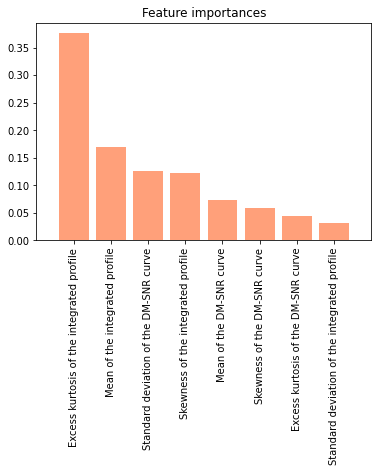

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X_train.shape[1]), df_names.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
matrix = confusion_matrix(y_test, y_pred3)
report = classification_report(y_test, y_pred3)
print(matrix)
print(report)

[[3288   18]
 [  41  233]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.85      0.89       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### 2.10. Using Selector Object for Selecting Features

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Import train_test_split from Scikit-learn
from sklearn.model_selection import train_test_split

# dividimos el sataset nuevamente para realizar esos métodos
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# creando el RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,
                             criterion='gini',
                             class_weight='balanced') # Use gini criterion to define feature importance

# Create a SelectFromModel object
sfm = SelectFromModel(estimator=rfc, # Use random forest classifier to identify features
                      threshold=0.2) # that have an importance of more than 0.2

# Train the selector
sfm = sfm.fit(X_train, y_train)

# Print the names of the most important features
print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + df_names.columns[feature_list_index])

The most important features based on random forest classifier:
- Excess kurtosis of the integrated profile


In [ ]:
# ahora buscamos los score completos del subset entregado
# Separación de data set en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(X_data[['Mean of the integrated profile', 'Standard deviation of the integrated profile','Excess kurtosis of the integrated profile']],
                                                    y_data, test_size = 0.2, random_state = 0)
# Partimos por estandarizar las variables
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit4 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

y_pred4 = fit4.predict(X_test_sc)

matrix = confusion_matrix(y_test, y_pred4)
report = classification_report(y_test, y_pred4)
print(matrix)
print(report)

0.025320768356323242
[[3292   14]
 [  58  216]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3306
           1       0.94      0.79      0.86       274

    accuracy                           0.98      3580
   macro avg       0.96      0.89      0.92      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

In [ ]:
skf = StratifiedKFold(n_splits=10)
lasso = LassoCV(cv=skf, random_state=42).fit(X_train, y_train)

In [ ]:
print('Selected Features:', list(df_names.columns[np.where(lasso.coef_!=0)[0]]))

Selected Features: ['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile']


### 3. Reducción de Dimensionalidad

Con el mismo algoritmo de clasificación anterior, ocupe PCA y Factor Analisis para reducir las dimensiones del problema, reporte el indice F1 y el reporte de clasificación. Comente las diferencias sobre los resultados obtenidos.

## 3.1. PCA

Realizamos un analisis de componentes para identificar aquellos que expliquen gran parte de la variabilodad del dataset sin perder demasiada información. Luego se procederá a utilizar el set de datos reducido para modelar y validar una regresión lógistica

In [ ]:
# Definimos el modelo de PCA

pca = PCA()
pca.fit(X_data)
X_pca = pca.transform(X_data)

print("original shape: ", X_data.shape)
print("transformed shape:", X_pca.shape)


original shape:  (17898, 8)
transformed shape: (17898, 8)


In [ ]:
# Mediante pca.components_ obtenemos el conjunto de todos los autovectores

print(pca.components_)

[[ 3.93790524e-02  2.12132552e-03 -2.36016162e-03 -1.30452449e-02
  -1.07778986e-01 -1.09872409e-01  3.91882035e-02  9.86430469e-01]
 [-4.93451087e-01 -4.86140258e-02  2.14465098e-02  1.14282248e-01
   7.56381283e-01  3.81129967e-01 -3.69647093e-02  1.47929813e-01]
 [ 8.35735549e-01  1.65585954e-01 -2.62072142e-02 -1.20770622e-01
   4.67020474e-01  1.97027575e-01 -2.12056185e-02  3.84363900e-02]
 [-4.37304831e-02  4.42071549e-02 -4.45329530e-03 -2.10562967e-02
   4.40108782e-01 -8.92373363e-01  5.41297467e-02 -5.20978317e-02]
 [-2.11743131e-01  9.18955587e-01 -2.46151133e-02 -3.25729195e-01
  -4.93114242e-02  3.90131960e-02 -4.98145170e-03  1.26565419e-03]
 [ 9.73366151e-02  3.51578476e-01  1.08638274e-01  9.23178813e-01
  -4.15587984e-02 -3.09849511e-02 -1.30168120e-02  3.51986902e-04]
 [-3.67564771e-04 -8.51122484e-03  7.18211477e-03 -1.47992924e-02
  -1.75239977e-02 -7.09220900e-02 -9.96715325e-01  2.96369630e-02]
 [-1.67136880e-02  9.99791166e-03 -9.93160645e-01  1.14729374e-01
  -

In [ ]:
# Con los autovectores y autovalores, la cantidad de variación explicada por cada
# uno de los componentes seleccionados se obtiene mediante pca.explained_variance_.

print(pca.explained_variance_)


[1.16350775e+04 1.04446764e+03 5.49743692e+02 8.22777890e+01
 3.25545877e+01 1.28041973e+01 5.21704598e-01 3.73967707e-02]


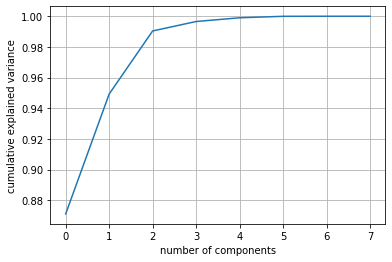

In [ ]:
# Graficamos la variación acumulada de los componentes por orden de importancia

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show();

In [ ]:
# Iniciamos PCA con dos componentes

pca = PCA(2).fit(X_data)
X_pca = pca.transform(X_data)

In [ ]:
# Transformamos array en data frame y le añadimos la variable Class
df_red = pd.DataFrame(data=X_pca, columns=["principal component 1", "principal component 2"])
df_red['Class'] = y_data

df_red

,principal component 1,principal component 2,Class
0,-27.191086,-29.677875,0
1,24.476215,-6.024175,0
2,-39.938920,-10.828048,0
3,-48.000825,-29.833257,0
4,147.919433,18.562548,0
...,...,...,...
17893,182.732691,-0.891664,0
17894,-97.402280,-10.218452,0
17895,-103.268475,-0.563544,0
17896,31.796009,-10.979306,0


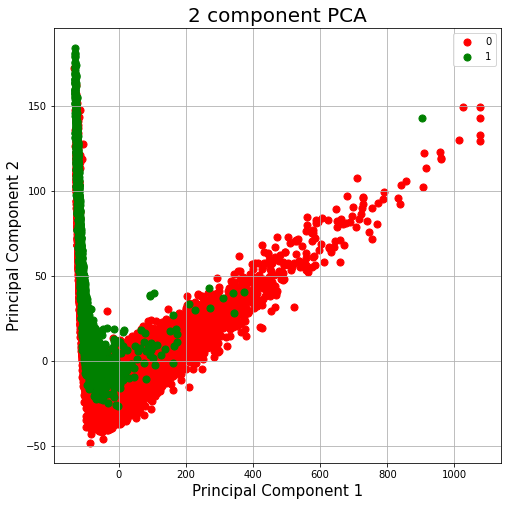

In [ ]:
# Finalmente graficamos el dataset usando los dos componentes

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_red['Class'] == target
    ax.scatter(df_red.loc[indicesToKeep, 'principal component 1']
               , df_red.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# Separación de data set en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(df_red[['principal component 1','principal component 2']],
                                                    df_red['Class'], test_size = 0.2, random_state = 0)
# Partimos por estandarizar las variables
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

y_pred = fit1.predict(X_test_sc)

matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

0.03299713134765625
[[3223   83]
 [ 166  108]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3306
           1       0.57      0.39      0.46       274

    accuracy                           0.93      3580
   macro avg       0.76      0.68      0.71      3580
weighted avg       0.92      0.93      0.92      3580



## 3.2 Reducción de dimensionalidad a través de Factor Analysis.

Se considera como modelo a evaluar, la regresión logística. Utilizando como supuesto el de análisis factorial exploratorio, en que cualquier variable observada está directamente asociada con cualquier factor.

In [ ]:
#Se instala el package factor analizer
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 254 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=c91f9592c6fd239ad100d8e74410a96c980ccea7a1f399e81394cc465a76a564
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
# Para facilitar el análisis, se quitan los valores na
data.dropna(inplace=True)

In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(199902.7497084058, 0.0)

In [ ]:
kmo_all,kmo_model=calculate_kmo(data)
print(kmo_model)

0.6748750176625629


In [ ]:

fa = FactorAnalyzer()
fa.fit(data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([4.73129461, 2.19732559, 0.81789457, 0.50446751, 0.31135201,
       0.25791771, 0.14630149, 0.01742027, 0.01602625])

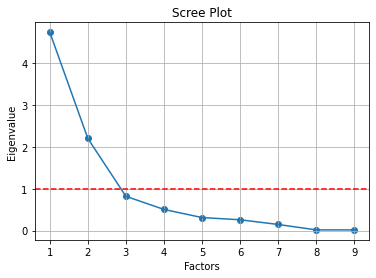

In [ ]:

plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.axhline(y=1, xmin=0.0, xmax=1.0, color='red', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=2)
datos_fa = fa.fit_transform(data)
len(datos_fa)

17898

In [ ]:
cargas = pd.DataFrame(data = fa.loadings_,
                       columns=['Factor_1','Factor_2'],
                       index = data.columns)
cargas

,Factor_1,Factor_2
Mean of the integrated profile,-0.874766,0.024352
Standard deviation of the integrated profile,-0.634210,0.193792
Excess kurtosis of the integrated profile,0.976497,0.070432
Skewness of the integrated profile,0.884274,0.084256
Mean of the DM-SNR curve,0.132910,0.638518
Standard deviation of the DM-SNR curve,0.083715,0.850645
Excess kurtosis of the DM-SNR curve,0.104872,-1.041341
Skewness of the DM-SNR curve,0.124823,-0.791793
Class,0.687651,0.216183


In [ ]:
factor_variance = pd.DataFrame(data = fa.get_factor_variance(),
                       columns=['Factor_1','Factor_2'],
                       index = ['SS_Loadings','Proportion Var','Cummulative Var'])
factor_variance

,Factor_1,Factor_2
SS_Loadings,3.427040,2.939571
Proportion Var,0.380782,0.326619
Cummulative Var,0.380782,0.707401


In [ ]:
#Modelo de regresion logística con datos originales.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=4)

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time1 = end_time-start_time
print(time1)

y_pred = fit1.predict(X_test_sc)

matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

0.1579573154449463
[[4048   17]
 [  68  342]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4065
           1       0.95      0.83      0.89       410

    accuracy                           0.98      4475
   macro avg       0.97      0.91      0.94      4475
weighted avg       0.98      0.98      0.98      4475



In [ ]:
#Modelo de regresion logística con datos de factores.
fa = FactorAnalyzer(n_factors=2)
X_train = fa.fit_transform(X_train, y_train)
X_test = fa.transform(X_test)

classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit2 = classifier.fit(X_train, y_train)
end_time = time.time()
time3 = end_time-start_time
print(time3)


y_pred = fit2.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

0.0834965705871582
[[4047   18]
 [  73  337]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4065
           1       0.95      0.82      0.88       410

    accuracy                           0.98      4475
   macro avg       0.97      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475

